In [1]:
from datetime import datetime, timedelta

# Timing

## Estimation

In [45]:
current_iter = 228

max_iter = 354
start_time = datetime.strptime("Oct 19 2022, 14:18:54", "%b %d %Y, %H:%M:%S")
cur_time = datetime.now()
time_since_start = cur_time - start_time
iter_per_sec = current_iter/time_since_start.total_seconds()
seconds_total = max_iter/iter_per_sec
time_total = timedelta(seconds=seconds_total)
seconds_left = (max_iter-current_iter)/iter_per_sec
time_left = timedelta(seconds=seconds_left)

print( f"current progress: {current_iter/max_iter*100}%")
print( f"expected total duration: {time_total.days} days {time_total.seconds//3600} hours {(time_total.seconds//60)%60} minutes {time_total.seconds%60} seconds left" )
print( f"expected duration: {time_left.days} days {time_left.seconds//3600} hours {(time_left.seconds//60)%60} minutes {time_left.seconds%60} seconds left" )
print( (cur_time + time_left).strftime("%b %d %Y, %H:%M:%S") )

current progress: 64.40677966101694%
expected total duration: 0 days 4 hours 42 minutes 50 seconds left
expected duration: 0 days 1 hours 40 minutes 40 seconds left
Oct 19 2022, 19:01:44


## Duration

In [39]:
def print_time_metrics(max_iter, start_ts, end_ts, ts_format="%b %d %Y, %H:%M:%S", resume_iter=0):
    start_time = datetime.strptime(start_ts, ts_format)
    finish_time = datetime.strptime(end_ts, ts_format)
    duration = finish_time - start_time
    time_per_chunk = duration.total_seconds()/(max_iter-resume_iter)
    print( f"{time_per_chunk} seconds per iteration" )
    print( f"total taken duration: {duration.days} days {duration.seconds//3600} hours {(duration.seconds//60)%60} minutes {duration.seconds%60} seconds left" )
    full_duration = timedelta(seconds=time_per_chunk*max_iter)
    print( f"expected total duration: {full_duration.days} days {full_duration.seconds//3600} hours {(full_duration.seconds//60)%60} minutes {full_duration.seconds%60} seconds left" )

## Local

### Train

In [32]:
print_time_metrics(
    resume_iter = 0, 
    max_iter = 80000,
    start_ts = "Oct 17 2022, 19:26:21",
    end_ts = "Oct 18 2022, 05:43:48",
)

0.4630875 seconds per iteration
total taken duration: 0 days 10 hours 17 minutes 27 seconds left
expected total duration: 0 days 10 hours 17 minutes 27 seconds left


In [33]:
print_time_metrics(
    resume_iter = 0,
    max_iter = 500000,
    start_ts = "Sep 26 2022, 19:55:00",
    end_ts = "Sep 29 2022, 19:05:00",
)

0.5124 seconds per iteration
total taken duration: 2 days 23 hours 10 minutes 0 seconds left
expected total duration: 2 days 23 hours 10 minutes 0 seconds left


### Index

In [24]:
print_time_metrics(
    resume_iter = 1, 
    max_iter = 354,
    start_ts = "Oct 18, 11:39:40",
    end_ts = "Oct 18, 15:56:10",
    ts_format = "%b %d, %H:%M:%S"
)

43.59773371104816 seconds per chunk
total taken duration: 0 days 4 hours 16 minutes 30 seconds left
expected total duration: 0 days 4 hours 17 minutes 13 seconds left


In [42]:
print_time_metrics(
    resume_iter = 0, 
    max_iter = 354,
    start_ts = "Oct 18 2022, 22:42:31",
    end_ts = "Oct 19 2022, 02:48:09",
)

41.632768361581924 seconds per iteration
total taken duration: 0 days 4 hours 5 minutes 38 seconds left
expected total duration: 0 days 4 hours 5 minutes 38 seconds left


In [42]:
print_time_metrics(
    resume_iter = 0, 
    max_iter = 354,
    start_ts = "Oct 19 2022, 08:17:55",
    end_ts = "Oct 19 2022, 02:48:09",
)

41.632768361581924 seconds per iteration
total taken duration: 0 days 4 hours 5 minutes 38 seconds left
expected total duration: 0 days 4 hours 5 minutes 38 seconds left


### Retrieval

In [27]:
print_time_metrics(
    max_iter = 101093,
    start_ts = "Oct 19 2022, 06:32:36",
    end_ts = "Oct 19 2022, 07:26:26",
)

0.03195077799649827 seconds per iteration
total taken duration: 0 days 0 hours 53 minutes 50 seconds left
expected total duration: 0 days 0 hours 53 minutes 50 seconds left


In [40]:
print_time_metrics(
    max_iter = 101093,
    start_ts = "Oct 18 2022, 18:48:51",
    end_ts = "Oct 18 2022, 19:41:02",
)

0.030971481704964735 seconds per iteration
total taken duration: 0 days 0 hours 52 minutes 11 seconds left
expected total duration: 0 days 0 hours 52 minutes 11 seconds left


## EC2

### Index

In [28]:
print_time_metrics(
    resume_iter = 207,
    max_iter = 354,
    start_ts = "Oct 08 2022, 02:06:22",
    end_ts = "Oct 08 2022, 07:14:33",
)

125.78911564625851 seconds per chunk
total taken duration: 0 days 5 hours 8 minutes 11 seconds left
expected total duration: 0 days 12 hours 22 minutes 9 seconds left


### Retrieval

In [41]:
print_time_metrics(
    resume_iter = 0,
    max_iter = 101093,
    start_ts = "Oct 08 2022, 07:33:26",
    end_ts = "Oct 08 2022, 08:15:08",
)

0.024749488095120335 seconds per iteration
total taken duration: 0 days 0 hours 41 minutes 42 seconds left
expected total duration: 0 days 0 hours 41 minutes 42 seconds left


# Pull Stats

In [2]:
import re
import os
import pandas as pd
import numpy as np

In [3]:
all_model_results = []
for file_path, file_name in [(x.path, x.name) for x in os.scandir(r"ColBERT\experiments\msmarco_500.000\retrieval") if x.name.endswith("log")]:    
    model_param = {}
    model_step = ""
    for data in re.split(r'(?<=[0-9])\.(?=[^0-9])|(?<=[a-z])\.(?=[^0-9])', file_name):
        if "=" in data:
            data_split = data.split("=")
            model_param[data_split[0]] = data_split[1]
        elif 'msmarco' in data:
            model_param['num_steps'] = "".join(data.split(".")[1:])

    with open(file_path, "r") as file:
        results = file.readlines()

    model_metrics = {}
    for m in [x for x in results if ("MRR@" in x or "Recall@" in x) and "only for ranked" not in x and "=" in x]:
        key, val = m.split("#>")[-1].split("=")
        model_metrics[key.strip()] = float(val)
    model_param.update(model_metrics)
    all_model_results.append(model_param)
len(all_model_results)

20

In [4]:
df = pd.DataFrame(all_model_results)
df.prune.fillna(0, inplace=True)
print(df.shape)
df.sample(3)

(20, 10)


,num_steps,nbits,prune,prune_type,ranking,MRR@10,Recall@50,Recall@100,Recall@200,Recall@1000
14,400000,2,0.2,attention_no_dense,1000,0.353181,0.796348,0.847427,0.883021,0.919341
5,400000,2,0.1,attention,1000,0.358179,0.809066,0.861275,0.897166,0.932763
16,400000,2,0,NaN,1000,0.357418,0.807960,0.859794,0.895890,0.930948


In [5]:
for col in df.columns:
    if "@" in col:
        df[col] = df[col].astype(np.float)*100

C:\Users\Kevin\AppData\Local\Temp\ipykernel_11168\2763620925.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df[col] = df[col].astype(np.float)*100


In [6]:
df.sort_values(['MRR@10', 'Recall@100'])

,num_steps,nbits,prune,prune_type,ranking,MRR@10,Recall@50,Recall@100,Recall@200,Recall@1000
17,500000,1,0,NaN,100,34.616486,77.931346,82.585915,NaN,NaN
18,500000,2,0,NaN,100,35.116619,78.231644,82.710215,NaN,NaN
14,400000,2,0.2,attention_no_dense,1000,35.318104,79.634778,84.742704,88.302086,91.934099
19,80000,2,0,NaN,100,35.483604,81.370596,86.180953,NaN,NaN
11,400000,2,0.15,dense,1000,35.609901,80.561343,85.769729,89.443395,92.923369
15,400000,2,0.2,dense,1000,35.651877,80.589922,85.685763,89.285569,92.879976
7,400000,2,0.1,dense,1000,35.738310,80.924107,86.065560,89.652650,93.220579
16,400000,2,0,NaN,1000,35.741835,80.795968,85.979404,89.589046,93.094840
3,400000,2,0.05,dense,1000,35.760545,80.928605,86.034732,89.668994,93.239921
1,400000,2,0.05,attention,1000,35.781703,80.848927,86.050626,89.628510,93.152686


In [7]:
df.groupby(['num_steps','nbits','prune_type','prune'], dropna=False).first()

ranking     MRR@10  Recall@50  \
num_steps nbits prune_type         prune                                 
400000    2     all                0.05     1000  35.820263  80.832194   
                                   0.1      1000  35.787439  80.903115   
                                   0.15     1000  35.834838  81.002255   
                                   0.2      1000  35.835060  81.153094   
                attention          0.05     1000  35.781703  80.848927   
                                   0.1      1000  35.817927  80.906564   
                                   0.15     1000  35.935034  81.275205   
                                   0.2      1000  36.023305  81.421996   
                attention_no_dense 0.05     1000  35.801308  80.847787   
                                   0.1      1000  35.890338  80.964470   
                                   0.15     1000  35.932157  81.281502   
                                   0.2      1000  35.318104  79.634778   
                dense              0.05     1000  35.760545  80.928605   
                                   0.1      1000  35.738310  80.924107   
                                   0.15     1000  35.609901  80.561343   
                                   0.2      1000  35.651877  80.589922   
                NaN                0        1000  35.741835  80.795968   
500000    1     NaN                0         100  34.616486  77.931346   
          2     NaN                0         100  35.116619  78.231644   
80000     2     NaN                0         100  35.483604  81.370596   

                                          Recall@100  Recall@200  Recall@1000  
num_steps nbits prune_type         prune                                       
400000    2     all                0.05    86.062261   89.646353    93.184923  
                                   0.1     86.084062   89.626921    93.222888  
                                   0.15    86.230433   89.793863    93.340590  
                                   0.2     86.319647   89.905418    93.525946  
                attention          0.05    86.050626   89.628510    93.152686  
                                   0.1     86.127455   89.716644    93.276296  
                                   0.15    86.467397   90.016283    93.606313  
                                   0.2     86.580931   90.210455    93.717718  
                attention_no_dense 0.05    86.049426   89.648272    93.153946  
                                   0.1     86.190669   89.748132    93.328925  
                                   0.15    86.494536   90.065104    93.563880  
                                   0.2     84.742704   88.302086    91.934099  
                dense              0.05    86.034732   89.668994    93.239921  
                                   0.1     86.065560   89.652650    93.220579  
                                   0.15    85.769729   89.443395    92.923369  
                                   0.2     85.685763   89.285569    92.879976  
                NaN                0       85.979404   89.589046    93.094840  
500000    1     NaN                0       82.585915         NaN          NaN  
          2     NaN                0       82.710215         NaN          NaN  
80000     2     NaN                0       86.180953         NaN          NaN

In [8]:
import matplotlib.pyplot as plt

In [9]:
base_df = df[(df.num_steps == "400000")]

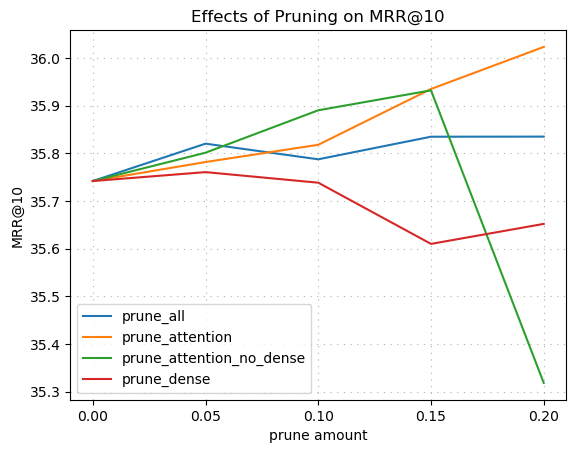

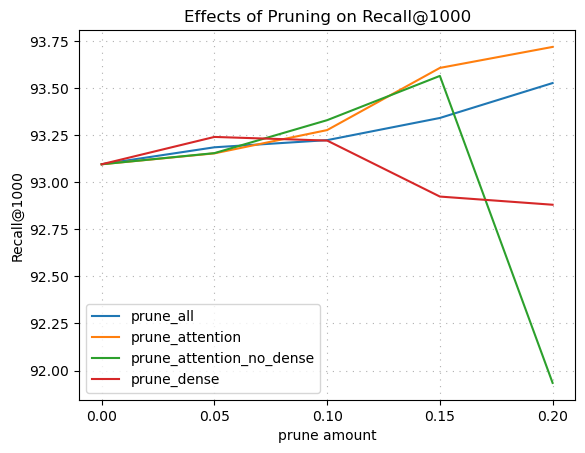

In [10]:
for metric in ["MRR@10", "Recall@1000"]:
    for prune_type in ['all', 'attention', 'attention_no_dense', 'dense']:
        plt.plot(
            [0,0.05,0.1,0.15,0.2],
            np.pad(
                np.concatenate( 
                    [base_df[(base_df.prune == 0)][metric].values, 
                    base_df[(base_df.prune_type == prune_type)][metric].values,
                ]), 
                (0,5), constant_values=np.nan)[:5],
            label =f'prune_{prune_type}'
        )
    plt.xticks([0,0.05,0.1,0.15,0.2]);
    plt.title(f"Effects of Pruning on {metric}")
    plt.ylabel(metric)
    plt.xlabel("prune amount")
    plt.legend();
    plt.grid(True, axis='both', linestyle=(0, (1,5)))
    plt.show()

# Remove Unused Dev Queries

In [6]:
from collections import defaultdict
from tqdm.auto import tqdm

In [7]:
qid2positives = defaultdict(list)
qid2ranking = defaultdict(list)
qid2mrr = {}
qid2recall = {depth: {} for depth in [50, 100, 200, 1000]}#, 5000, 10000]}

with open(r'data/qrels.dev.tsv') as f:
    for line in tqdm(f):
        qid, _, pid, label = map(int, line.strip().split())
        assert label == 1

        qid2positives[qid].append(pid)
len(qid2positives)

0it [00:00, ?it/s]

55578

In [9]:
queries = dict()
with open(r"data/queries.dev.tsv", encoding='utf-8') as f:
    for line in f:
        qid, query, *_ = line.strip().split('\t')
        qid = int(qid)

        assert (qid not in queries), ("Query QID", qid, "is repeated!")
        queries[qid] = query
len(queries)

101093

In [12]:
queries_cleaned = {k:v for k,v in queries.items() if k in qid2positives}
len(queries_cleaned)

55578

In [15]:
with open(r"data/queries.dev_clean.tsv", 'w', encoding='utf-8') as f:
    for qid, content in queries_cleaned.items():
        content = f'{qid}\t{content}\n'
        f.write(content)